## Problem Statement
Given some attributes regarding the patients, we would like to predict the insurance cost using machine learning. We can use Mean Absolute Error and Root Mean Squared Error to compare the different models.

| Algorithm                    | Mean Absolute Error (MAE) | Root Mean Squared Error (RMSE)|
|------------------------------|---------------------|-------------------------|
| Linear Regression            |                     |                         |
| Guassian Kernel Regression   |                     |                         |
| Polynomial Kernel Regression |                     |                         |
| Support Vector Regression    |                     |                         |
| Decision Tree Regression     |                     |                         |
| Random Forest Regression     |                     |                         |
| Light GBM Regression         |                     |                         |
| Neural Networks              |                     |                         |

### TODO
- Perform K-Fold cross validation
- Plot a graph comparing all the algorithms
- How does the type of encoding used affects each algorithm

In [78]:
import copy
import pandas as pd
import numpy as np

from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

import lightgbm as lgb

from matplotlib import pyplot as plt

In [100]:
df = pd.read_csv('./data/insurance.csv')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
processed_df = copy.deepcopy(df)

In [6]:
processed_df['sex'] = np.where(df['sex'] == 'female', 1, 0)
processed_df['smoker'] = np.where(df['smoker'] == 'yes', 1, 0)

In [6]:
processed_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [7]:
processed_df = pd.get_dummies(processed_df, prefix='region', columns=['region'], dtype='int')

### Linear Regression

In [121]:
X_train, X_test, y_train, y_test = train_test_split(processed_df[processed_df.columns.difference(['charges'])], processed_df['charges'])
clf = LinearRegression()

In [9]:
clf.fit(X_train, y_train)

LinearRegression()

In [18]:
X_train

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,sex,smoker
58,53,22.880,1,0,0,1,0,1,1
831,36,25.840,0,0,1,0,0,1,0
387,50,25.365,2,0,1,0,0,0,0
1301,62,30.875,3,0,1,0,0,0,1
849,55,32.775,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
5,31,25.740,0,0,0,1,0,1,0
1003,48,29.600,0,0,0,0,1,0,0
1110,54,32.300,1,1,0,0,0,1,0
1194,31,21.755,0,0,1,0,0,1,0


In [17]:
clf.coef_

array([  246.79915771,   343.30284352,   397.93901988,   583.54965301,
         378.57939086,  -482.40361387,  -479.72543   ,    83.47915342,
       23598.985058  ])

In [15]:
clf.score(X_test, y_test)

0.7631639735405947

In [19]:
y_pred = clf.predict(X_test)

In [20]:
root_mean_squared_error(y_test, y_pred)

6130.310702645122

Let us normalize all the columns and then perform regression

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
clf = LinearRegression()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(root_mean_squared_error(y_test, y_pred))

0.7631639735405948
6130.310702645122


Scaling did not have any affect on linear regression. Lets try Kernalized Ridge Regression.

In [28]:
X_train

array([[ 0.98636292, -1.28327175, -0.08188813, ..., -0.58387421,
         1.02524375,  1.97298832],
       [-0.2296355 , -0.7924489 , -0.91152236, ..., -0.58387421,
         1.02524375, -0.50684537],
       [ 0.77177496, -0.87121271,  0.74774611, ..., -0.58387421,
        -0.97537781, -0.50684537],
       ...,
       [ 1.05789223,  0.2787388 , -0.08188813, ..., -0.58387421,
         1.02524375, -0.50684537],
       [-0.58728209, -1.4698176 , -0.91152236, ..., -0.58387421,
         1.02524375, -0.50684537],
       [ 0.19954041, -0.18886945,  0.74774611, ..., -0.58387421,
         1.02524375, -0.50684537]])

## Gaussian Kernel

In [31]:
kr = KernelRidge(kernel='rbf')
kr.fit(X_train, y_train)

KernelRidge(kernel='rbf')

In [32]:
kr.score(X_test, y_test)

0.8309920747792541

In [34]:
y_pred = kr.predict(X_test)
root_mean_squared_error(y_test, y_pred)

5178.597275994341

## Polynomial Kernel

In [132]:
poly_kr = KernelRidge(kernel='poly', degree=2)
poly_kr.fit(X_train, y_train)

print(poly_kr.score(X_test, y_test))
y_pred = poly_kr.predict(X_test)
print(root_mean_squared_error(y_test, y_pred))

0.8175985501797193
5155.3436997005665


## Decision Tree Regression

In [55]:
dtr = DecisionTreeRegressor(min_samples_leaf=25)
dtr.fit(X_train, y_train)

print(f'R2 coefficient - {dtr.score(X_test, y_test)}')
y_pred = dtr.predict(X_test)
print(f'RMSE - {root_mean_squared_error(y_test, y_pred)}')
print(f'Mean Absolute Error - {mean_absolute_error(y_test, y_pred)}')

R2 coefficient - 0.8544963197666267
RMSE - 4536.274288019071
Mean Absolute Error - 2567.2410732553776


In [61]:
y_train[58]

23244.7902


Lets perform K-fold cross validation on decision tree and estimate the performance.

In [53]:
def cv_estimate(n_splits=None):
    cv = KFold(n_splits=n_splits)
    cv_clf = DecisionTreeRegressor(min_samples_leaf=25)
    val_scores = []
    for train, test in cv.split(X_train, y_train):
        cv_clf.fit(X_train[train], y_train[train])
        val_scores.append(cv_clf.score(X_train[test], y_train[test]))
    return val_scores

## Random Forest Regression

In [51]:
rf = RandomForestRegressor(max_depth=4, random_state=0, min_samples_leaf=25)
rf.fit(X_train, y_train)

print(f'R2 coefficient - {rf.score(X_test, y_test)}')
y_pred = rf.predict(X_test)
print(f'RMSE - {root_mean_squared_error(y_test, y_pred)}')

R2 coefficient - 0.8581539890413217
RMSE - 4478.894996329005


Lets see if changing the encoding of the categorical variables affect the performance of the model.

In [109]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['smoker', 'region', 'sex'])
binary_X = encoder.fit_transform(df)

In [110]:
type(binary_X)

pandas.core.frame.DataFrame

In [113]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['smoker', 'region', 'sex'])
binary_X = encoder.fit_transform(df)

X_train, X_test, y_train, y_test = train_test_split(binary_X[binary_X.columns.difference(['charges'])], binary_X['charges'])

rf = RandomForestRegressor(max_depth=4, random_state=0, min_samples_leaf=25)
rf.fit(X_train, y_train)

print(f'R2 coefficient - {rf.score(X_test, y_test)}')
y_pred = rf.predict(X_test)
print(f'RMSE - {root_mean_squared_error(y_test, y_pred)}')

R2 coefficient - 0.8760673394381929
RMSE - 4322.600933243148


In [116]:
import category_encoders as ce

encoder = ce.CatBoostEncoder(cols=['smoker', 'region', 'sex'])
binary_X = encoder.fit_transform(df[df.columns.difference(['charges'])], df['charges'])

X_train, X_test, y_train, y_test = train_test_split(binary_X[binary_X.columns.difference(['charges'])], df['charges'])

rf = RandomForestRegressor(max_depth=4, random_state=0, min_samples_leaf=25)
rf.fit(X_train, y_train)

print(f'R2 coefficient - {rf.score(X_test, y_test)}')
y_pred = rf.predict(X_test)
print(f'RMSE - {root_mean_squared_error(y_test, y_pred)}')

R2 coefficient - 0.8258189953089246
RMSE - 4790.720851204844


## Support Vector Regression

## Light GBM 

In [77]:
from lightgbm import LGBMRegressor

lgbr = LGBMRegressor(max_depth=5, num_leaves=20, n_estimators=80, random_state=10, reg_lambda=0.4)
lgbr.fit(X_train, y_train)

print(lgbr.score(X_test, y_test))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 1003, number of used features: 9
[LightGBM] [Info] Start training from score 13346.783604
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

## XGBoost Scikit-Learn

In [102]:
gbr = GradientBoostingRegressor(n_estimators=100, \
                                criterion='squared_error', \
                                min_samples_leaf=25, \
                                max_depth=3, \
                                max_features=None)

X_train, X_test, y_train, y_test = train_test_split(df[df.columns.difference(['charges'])], df['charges'])
gbr.fit(X_train, y_train)

print(gbr.score(X_test, y_test))
y_pred = gbr.predict(X_test)
print(root_mean_squared_error(y_test, y_pred))

ValueError: could not convert string to float: 'northwest'

## Neural Networks

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(5, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=5, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)


In [15]:
input = torch.randn(1, 1, 10, 5)
out = net(input)
print(out)

tensor([[[[0.1506],
          [0.3042],
          [0.2463],
          [0.1184],
          [0.3266],
          [0.2465],
          [0.1533],
          [0.3597],
          [0.1757],
          [0.3740]]]], grad_fn=<ReluBackward0>)


In [34]:
X_train.head(5)

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,sex,smoker
468,28,24.320,1,1,0,0,0,1,0
431,29,20.235,2,0,1,0,0,1,0
119,37,23.370,2,0,1,0,0,1,0
5,31,25.740,0,0,0,1,0,1,0
338,50,32.300,1,1,0,0,0,0,1


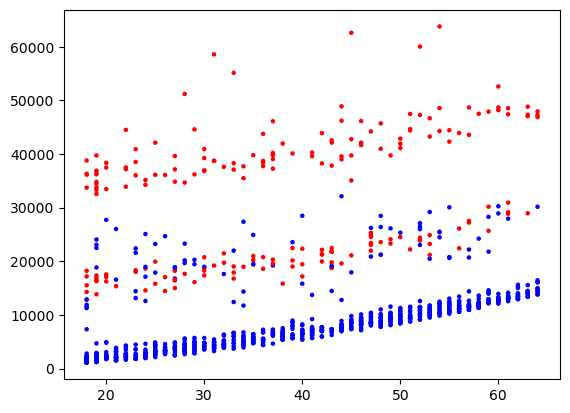

In [48]:
plt.scatter(X_train['age'], y_train, c=X_train['smoker'], s=5, cmap='bwr')
plt.show()

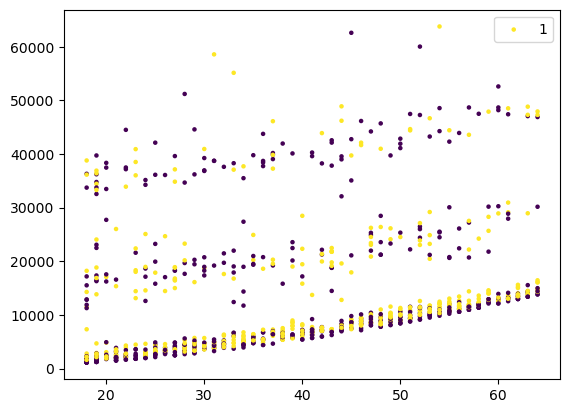

In [37]:
plt.scatter(X_train['age'], y_train, c=X_train['sex'], s=5)
plt.legend(X_train['sex'])
plt.show()

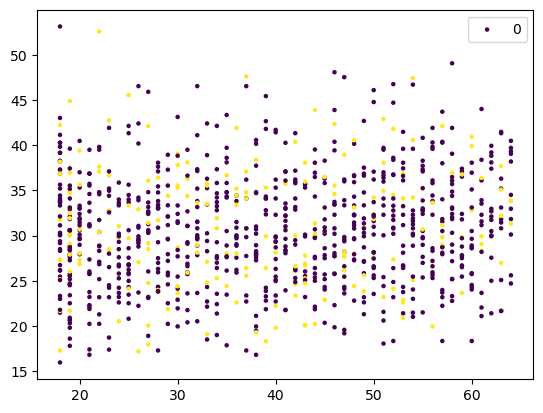

In [45]:
plt.scatter(X_train['age'], X_train['bmi'], c=X_train['smoker'], s=5)
plt.legend(X_train['smoker'])
plt.show()